# 🛍️ Análise de Vendas - Online Retail Dataset / Estudo de Enio Muliterno Neto


Este notebook explora o conjunto de dados **Online Retail**, realizando limpeza de dados, engenharia de atributos e análises exploratórias visuais.


In [32]:
# 📦 Importação de Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [33]:
# 📂 Carregamento do Dataset
df = pd.read_excel('data/OnlineRetail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [34]:
# 🔍 Visão Geral dos Dados
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000   

## 🧹 Limpeza de Dados
Por que limpar os dados?
Dados reais muitas vezes têm informações incompletas ou erradas que podem distorcer nossas análises. Limpar os dados ajuda a garantir que só trabalhamos com informações confiáveis.

O que foi feito?

Removi linhas sem descrição do produto, pois não é possível identificar o que foi vendido.

Excluí vendas com quantidade menor ou igual a zero, que normalmente indicam devoluções ou erros.

Também tirei registros com preço menor ou igual a zero, já que não fazem sentido para receita positiva.

Por fim, calculei a receita de cada venda multiplicando a quantidade pelo preço unitário.

## 🧾 Explicação do Código

dropna(subset=['Description']): remove linhas que não têm descrição do produto.

df[df['Quantity'] > 0]: mantém apenas as vendas com quantidade positiva.

df[df['UnitPrice'] > 0]: mantém só os registros com preço positivo.

df['Revenue'] = df['Quantity'] * df['UnitPrice']: cria uma nova coluna com o valor total da venda (quantidade × preço).

print(f'Tamanho após limpeza: {df.shape}'): mostra o tamanho do dataset após a limpeza, para verificar quantos registros foram mantidos.

In [35]:
# 🧹 Limpeza de Dados
df = df.dropna(subset=['Description'])
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df['Revenue'] = df['Quantity'] * df['UnitPrice']
print(f'Tamanho após limpeza: {df.shape}')
df.head()

Tamanho após limpeza: (530104, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [36]:
# 📅 Engenharia de Atributos
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

## 🌍 Receita Total por País  - em libras esterlinas (£)


O que é essa métrica?
Mostra a soma total da receita gerada por vendas em cada país. É uma forma de identificar os mercados que mais contribuem financeiramente para o negócio.

O que observei no resultado?

Os países no topo geralmente são os maiores mercados ou aqueles com maior poder de compra.

Na analise em específico , Reino Unído aparece em destaque. O banco de dados possúi maior foco para essa região, consequentemente, maiores dados para ela são gerados.

Ajuda a focar esforços em países que geram maior receita.

Pode indicar oportunidades para expandir vendas em mercados promissores.

## 🧾 Explicação do Código

Agrupa os dados por país (Country) e soma a receita (Revenue) de cada um.

Ordena os países pela receita total, do maior para o menor, e seleciona os 10 primeiros.

Cria um gráfico de barras mostrando os 10 países que mais geraram receita, facilitando a visualização do desempenho por mercado.

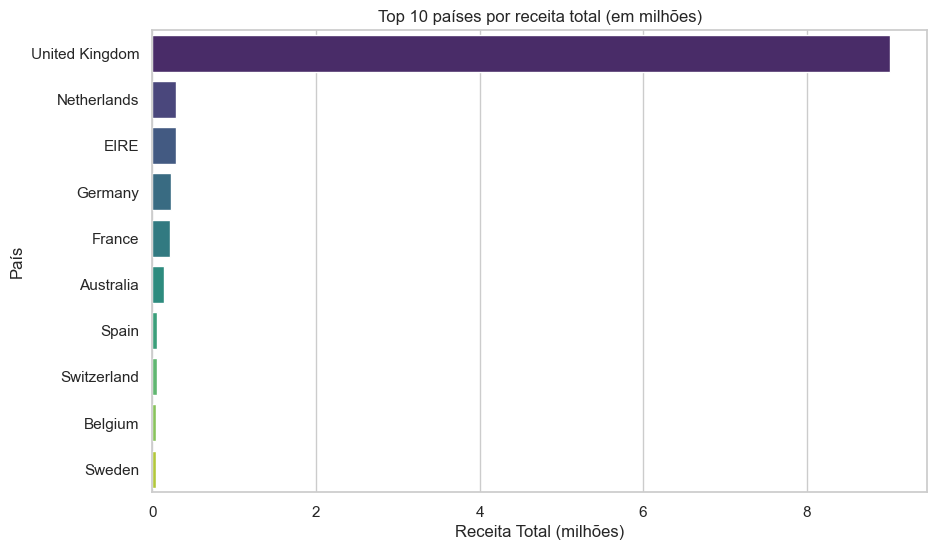

In [37]:
revenue_by_country = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
top_countries = revenue_by_country.head(10)
top_countries_milhoes = top_countries / 1_000_000

plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_countries_milhoes.values,
    y=top_countries_milhoes.index,
    hue=top_countries_milhoes.index,
    dodge=False,
    palette='viridis',
    legend=False
)
plt.title('Top 10 países por receita total (em milhões)')
plt.xlabel('Receita Total (milhões)')
plt.ylabel('País')
plt.show()


## 📦 Produtos Mais Vendidos (Quantidade)

O que é essa métrica?
É a soma total das unidades vendidas de cada produto. Mostra quais produtos foram os mais comprados em quantidade, ou seja, quais itens tiveram maior volume de vendas.

O que observei no resultado?

Geralmente aparecem produtos com alta rotatividade e muita demanda.

Esses produtos são importantes para entender quais itens são os preferidos dos clientes e que geram maior movimento.

Pode ajudar a focar em estoques e estratégias para os produtos mais populares.

## 🧾 Explicação do Código

Agrupa os dados por produto (Description) e soma a quantidade (Quantity) vendida de cada um.

Ordena os produtos pela quantidade vendida, do maior para o menor, e seleciona os 10 primeiros.

Plota um gráfico de barras mostrando esses produtos mais vendidos, facilitando a visualização do volume de vendas.

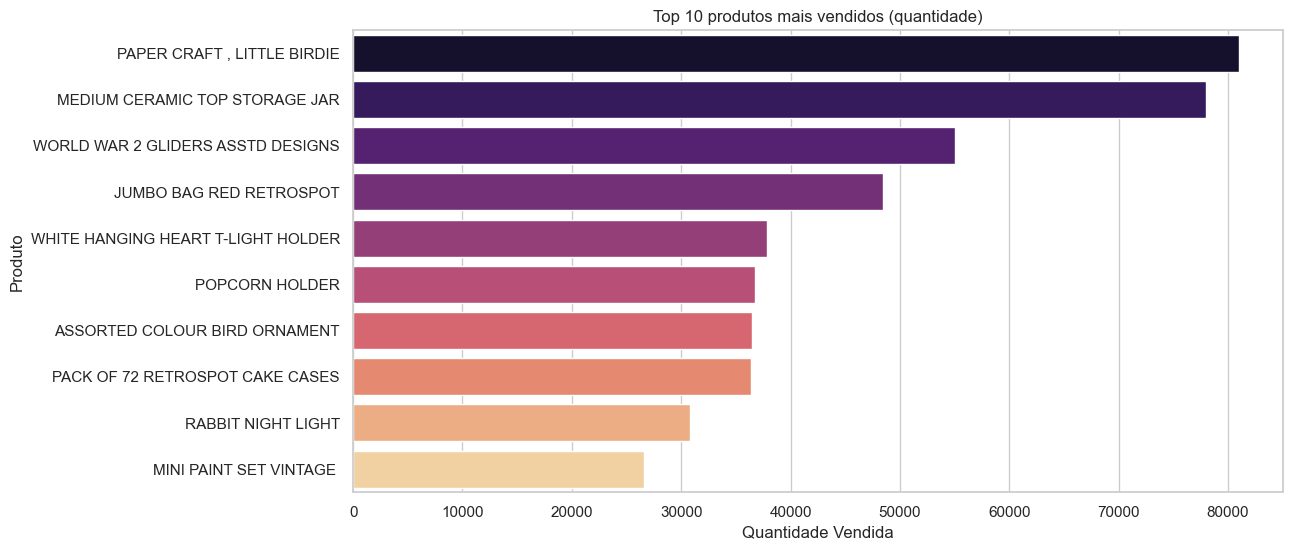

In [38]:
top_products_qty = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products_qty.values, y=top_products_qty.index, hue=top_products_qty.index, dodge=False, legend=False, palette='magma')
plt.title('Top 10 produtos mais vendidos (quantidade)')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Produto')
plt.show()

## 📈 Receita Mensal ao Longo do Tempo

O que é essa métrica? 
É a soma da receita total gerada em cada mês, ao longo do período de tempo do dataset. Serve para analisar tendências de crescimento ou queda nas vendas mês a mês.

O que observei no resultado?

É possível visualizar picos e quedas de receita ao longo do ano.

Tendências como alta no fim do ano (possivelmente por conta de datas comemorativas como Natal) podem se destacar.

Também permite identificar meses com baixa atividade, que podem indicar feriados, sazonalidade ou problemas de registro.

Essa métrica ajuda a avaliar o desempenho da empresa ao longo do tempo e a tomar decisões estratégicas, como promoções ou reforço de estoque em determinados meses.

## 🧾 Explicação do Código

Cria uma nova coluna chamada YearMonth, combinando o ano e o mês da coluna InvoiceDate.

Agrupa os dados por essa nova coluna (YearMonth) e soma a receita (Revenue) de cada mês.

O resultado é uma série temporal mostrando a receita total de cada mês, usada para analisar evolução mensal e visualizar gráficos de tendência.

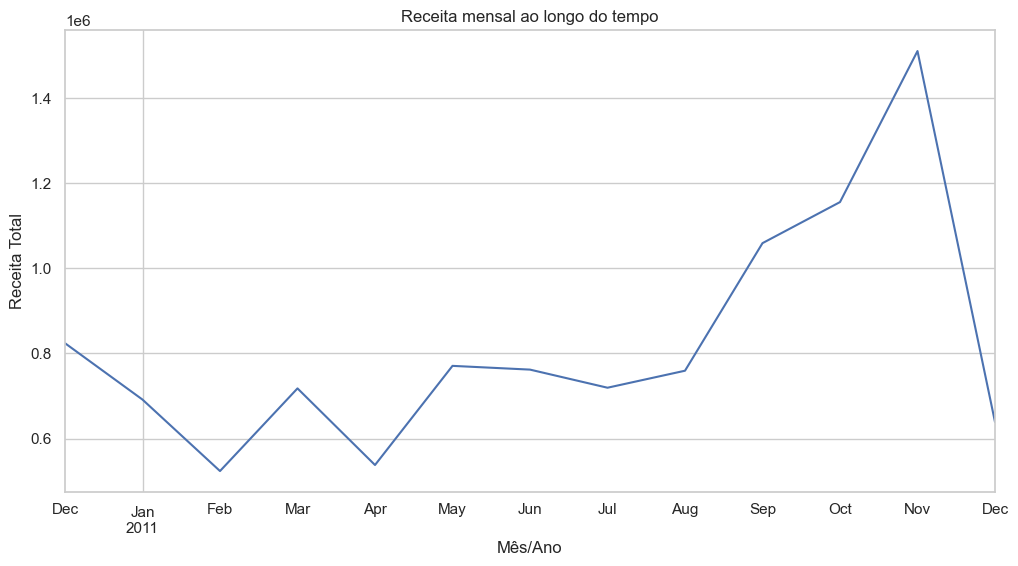

In [39]:
revenue_by_month = df.groupby('YearMonth')['Revenue'].sum()

plt.figure(figsize=(12, 6))
revenue_by_month.plot(kind='line')
plt.title('Receita mensal ao longo do tempo')
plt.xlabel('Mês/Ano')
plt.ylabel('Receita Total')
plt.grid(True)
plt.show()

## 💳 Ticket Médio por Produto
O que é o ticket médio?
Podemos entender com um exemplo simples: se um produto foi vendido 10 vezes e gerou R$ 100 de receita, então o ticket médio dele é R$ 10 — ou seja, em média, cada unidade foi vendida por R$ 10.

O que observei no resultado?
Geralmente, aparecem produtos especiais ou serviços, como "AMAZON FEE", "DOTCOM POSTAGE", ou móveis mais caros como "PICNIC BASKET WICKER 60 PIECES".

Ou seja, são itens vendidos em menor quantidade, mas com preços altos — produtos exclusivos ou com alto valor por unidade.

Esse tipo de análise mostra os 10 produtos mais caros em média, o que é útil para entender quais itens geram mais receita por unidade vendida.

## 🧾 Explicação do Código
Agrupa os dados por produto (Description) e soma a receita total (Revenue) e quantidade vendida (Quantity) de cada um.

1 Calcula o ticket médio, dividindo a receita total pela quantidade vendida.

2 Ordena os produtos pelo ticket médio, do maior para o menor.

3 Exibe os 10 produtos com maior ticket médio.

In [40]:
ticket_medio_produtos = df.groupby('Description').agg({'Revenue': 'sum', 'Quantity': 'sum'})
ticket_medio_produtos['TicketMedio'] = ticket_medio_produtos['Revenue'] / ticket_medio_produtos['Quantity']
ticket_medio_produtos = ticket_medio_produtos['TicketMedio'].sort_values(ascending=False).head(10)
ticket_medio_produtos

Description
Adjust bad debt                       11062.060000
AMAZON FEE                             6880.545000
PICNIC BASKET WICKER 60 PIECES          649.500000
DOTCOM POSTAGE                          292.137068
RUSTIC  SEVENTEEN DRAWER SIDEBOARD      154.714286
REGENCY MIRROR WITH SHUTTERS            153.000000
VINTAGE BLUE KITCHEN CABINET            141.730769
VINTAGE RED KITCHEN CABINET             135.416667
CHEST NATURAL WOOD 20 DRAWERS           114.375000
LOVE SEAT ANTIQUE WHITE METAL           107.068966
Name: TicketMedio, dtype: float64

## 📆 Receita Total por Dia da Semana
O que é essa métrica?
É a soma de toda a receita gerada em cada dia da semana. Isso ajuda a entender quais dias concentram mais vendas e em quais dias o movimento é mais fraco.

O que observei no resultado?

Quinta-feira e terça-feira são os dias com maior receita, indicando que são os mais movimentados em vendas.

Domingo tem a menor receita entre os dias com dados.

Sábado aparece como NaN (sem valor), o que indica que não há registros de vendas nesse dia, possivelmente por não haver operações ou registros incompletos.

Essa análise é útil para entender padrões semanais de consumo e otimizar campanhas ou estoques em dias de maior movimentação.

## 🧾 Explicação do Código

Cria uma nova coluna com o nome do dia da semana (ex: segunda, terça...) a partir da coluna de datas (InvoiceDate).

Agrupa os dados por essa nova coluna (DayOfWeek) e soma toda a receita (Revenue) de cada dia.

O resultado é uma tabela com a receita total gerada em cada dia da semana, usada para fazer comparações ou gráficos.

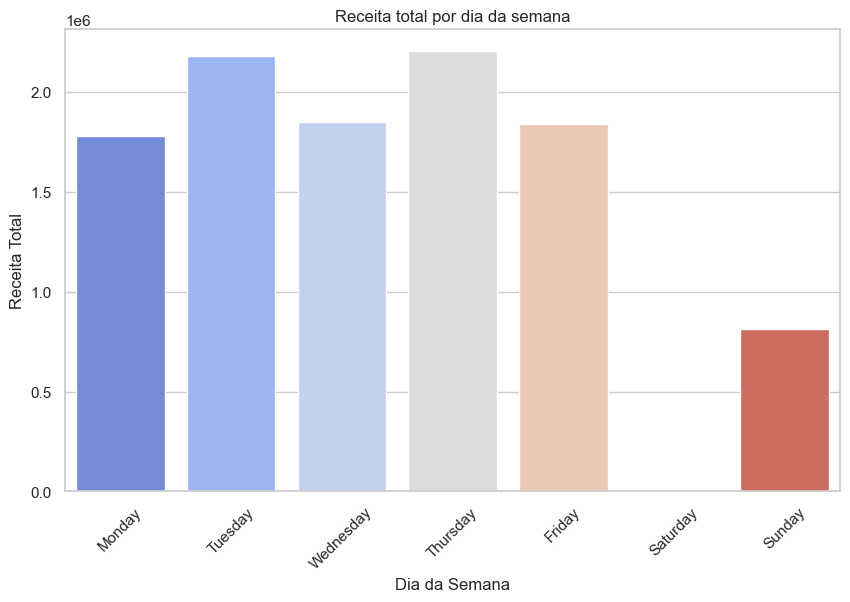

In [41]:
dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
vendas_por_dia = df.groupby('DayOfWeek')['Revenue'].sum().reindex(dias_semana)

plt.figure(figsize=(10, 6))
sns.barplot(x=vendas_por_dia.index, y=vendas_por_dia.values, hue=vendas_por_dia.index, dodge=False, legend=False, palette='coolwarm')
plt.title('Receita total por dia da semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Receita Total')
plt.xticks(rotation=45)
plt.show()